In [7]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd

import stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


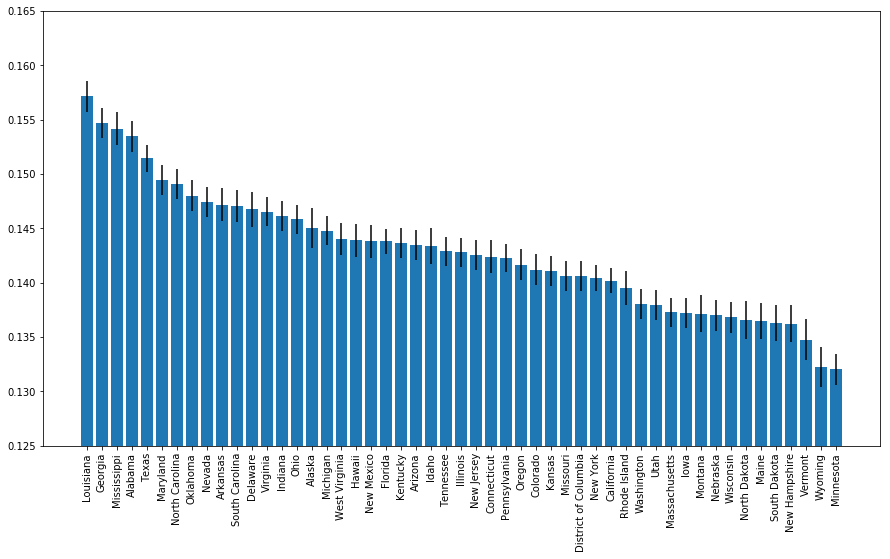

In [56]:
with open('twitter_data/states_features/sexism_distributions.json') as fh:
    sexism_dists = json.load(fh)

means_and_vars = np.array([stats.mean_and_var_for_population(x) for x in sexism_dists.values()])

means = means_and_vars[:,0]
stdevs = np.sqrt(means_and_vars[:,1])

df = pd.DataFrame({'state': list(sexism_dists.keys()), 'sexism_score': means, 'stdev': stdevs})
df.sort_values(by='sexism_score', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(15,8))
plt.bar(df.index, df['sexism_score'], yerr=df['stdev']*1.96)
plt.ylim(0.125, 0.165)
plt.xticks(list(df.index), list(df['state']), rotation='vertical')
plt.show()

In [58]:
df.sort_values('state').to_csv('scores.csv')

In [53]:
for k in sexism_dists.keys():
    print(k, len(sexism_dists[k]))

Alabama 615
Alaska 367
Arizona 677
Arkansas 573
California 970
Colorado 632
Connecticut 548
Delaware 487
Florida 919
Georgia 700
Hawaii 532
Idaho 438
Illinois 717
Iowa 623
Kansas 652
Kentucky 643
Louisiana 649
Maine 435
Maryland 662
Massachusetts 666
Michigan 668
Minnesota 605
Mississippi 564
Missouri 625
Montana 422
Nebraska 590
Nevada 680
New Hampshire 430
New Mexico 539
New York 902
Indiana 664
Utah 630
Ohio 703
Oklahoma 625
Oregon 592
Pennsylvania 704
Rhode Island 502
South Carolina 580
South Dakota 441
Tennessee 687
Texas 836
Vermont 344
Virginia 703
Washington 661
West Virginia 574
Wisconsin 606
Wyoming 359
District of Columbia 640
